# Trabajo Práctico 1 - Teoría de Algoritmos II
**Nombre: Mateo Capón Blanquer**

**Padrón: 104258**



## Enunciado

Aclaraciones: Cada ejercicio dice al final del mismo la cantidad de puntos que otorga por hacerse completamente bien (en total, 15). Se deben obtener al menos 9 puntos para aprobar. Para la fecha de entregar, enviar un mail a mbuchwald@fi.uba.ar con un pdf con la resolución, con nombre TP1-PADRON.pdf. Pueden incluir todo el material adicional que les parezca relevante (desde código hasta gráficos).


Considerando esta red que representa las conexiones de diferentes países por los vuelos (directos) realizados entre ellos, responder las siguientes preguntas. A los fines de estos ejercicios, se puede obviar la última columna del archivo csv.

## Análisis Introductorio y Preprocesamiento de los datos

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

df = pd.read_csv('World.csv')

# Leo este dataset de paises con más información que la dada en el dataset Wordl.csv.
# Fuente: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/
gdf = gpd.read_file("ne_110m_admin_0_countries")
# Uso centroid solo para graficar -> Ignoro warnings.
gdf["x"] = gdf['geometry'].centroid.x
gdf["y"] = gdf['geometry'].centroid.y

/tmp/ipykernel_62257/3981405351.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["x"] = gdf['geometry'].centroid.x
/tmp/ipykernel_62257/3981405351.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["y"] = gdf['geometry'].centroid.y


In [2]:
# Limpio algunos datos de World.csv para poder hacer merge con dataset con mas paises.
to_replace = {
    "United States": "United States of America",
    "China": "People's Republic of China",
    "Cote d'Ivoire": "Ivory Coast",
    "Bahamas": "The Bahamas",
    "Gambia": "The Gambia",
    "Macedonia": "North Macedonia",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Congo (Brazzaville)": "Republic of the Congo",
    "Sao Tome and Principe": "São Tomé and Príncipe",
    "Burma": "Myanmar",
    "Netherlands Antilles": "Curaçao",
}
df = df.replace(to_replace)

# Uso nx.Graph porque son vuelos entre ellos (no dirigido).
G = nx.from_pandas_edgelist(df, edge_attr='ConexionAeropuertos',\
                            source='Origen', target='Destino', create_using=nx.Graph())

In [3]:
print("Los nodos que no se encuentran en el dataframe con mas info son: ")
no_origin = set(df[~ df["Origen"].isin(gdf["NAME_EN"])]["Origen"])
no_dest = set(df[~ df["Destino"].isin(gdf["NAME_EN"])]["Destino"])
no_origin.union(no_dest)

Los nodos que no se encuentran en el dataframe con mas info son: 


{'Christmas Island',
 'Cocos (Keeling) Islands',
 'French Guiana',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'Micronesia',
 'Reunion',
 'Swaziland',
 'Virgin Islands'}

In [4]:
# Agrego información para esos nodos, haciendo busquedas en google maps.
# Las coordenadas que agrego son de puntos al azar dentro del pais / isla (solo las uso para graficar).

rows_to_add = [
    {"NAME_EN": "Martinique", "y": 14.636383, "x":-60.985519, "CONTINENT": "North America"},
    {"NAME_EN": "Reunion", "y": -21.133153, "x": 55.525737, "CONTINENT": "Africa"},
    {"NAME_EN": "French Guiana", "y":4.299076, "x":-52.972789, "CONTINENT": "South America"},
    {"NAME_EN": "Guadeloupe", "y":16.233781, "x": -61.633313, "CONTINENT": "North America"},
    {"NAME_EN": "Christmas Island", "y":-10.481556, "x": 105.652649, "CONTINENT": "Oceania"},
    {"NAME_EN": "Micronesia", "y":6.881294, "x": 158.219760, "CONTINENT": "Oceania"},
    {"NAME_EN": "Mayotte", "y":-12.805829, "x": 45.161262, "CONTINENT": "Africa"},
    {"NAME_EN": "Virgin Islands", "y":18.419666, "x":-64.633546, "CONTINENT": "North America"},
    {"NAME_EN": "Swaziland", "y":-26.458953, "x": 31.476765, "CONTINENT": "Africa"},
    {"NAME_EN": "Cocos (Keeling) Islands", "y":-12.152164, "x":96.869617, "CONTINENT": "Oceania"}
]

df_more_data = gdf[["NAME_EN", "x", "y", "CONTINENT"]]
df_more_data = pd.concat([df_more_data, pd.DataFrame(rows_to_add)])
df_more_data.head(5)

,NAME_EN,x,y,CONTINENT
0,Indonesia,117.270433,-2.222961,Asia
1,Malaysia,109.698868,3.792393,Asia
2,Chile,-71.364375,-37.743607,South America
3,Bolivia,-64.684754,-16.706877,South America
4,Peru,-74.378065,-9.154388,South America


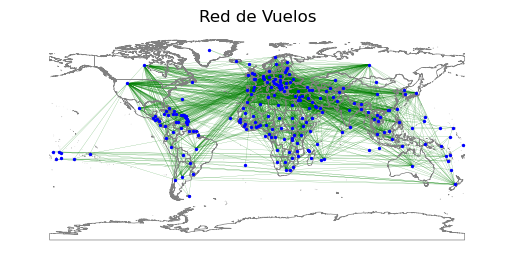

In [5]:
world = gdf.boundary.plot(color='gray', linewidth=0.5)
pos = {row["NAME_EN"]: (row["x"], row["y"]) for _,row in df_more_data.iterrows()} 
nx.draw(G, pos, with_labels=False, width= 0.1, node_size=2, node_color='blue', edge_color='green', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')

plt.title('Red de Vuelos')
plt.show()

In [6]:
print(f"La red tiene {G.number_of_nodes()} paises")

La red tiene 228 paises


## Ejercicio 1 
Determinar: 

a. El diámetro de la red.

In [7]:
diameter = nx.diameter(G)
print(f"El diámetro de la red es {diameter}")

El diámetro de la red es 4


Con tan solo 4 vuelos se puede llegar a cualquier país / isla de la red

b. El grado promedio de la red. 

In [8]:
mean_degree = sum(dict(G.degree()).values()) / len(G)
print(f"El grado promedio de la red es {mean_degree}")

El grado promedio de la red es 25.017543859649123


c. El coeficiente de clustering promedio de la red. 

In [9]:
clustering_coef = nx.average_clustering(G)
print(f"El coeficiente de clustering promedio de la red es {clustering_coef}")

El coeficiente de clustering promedio de la red es 0.6635981973803952


Este coeficiente de clustering es bastante alto. El 66% de los triangulos que se podrían formar, se están formando.

## Ejercicio 2 
a. Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia por ningún criterio, explicar. Justificar detalladamente.


### Hipótesis: Hay homofilia por Continente

Para determinar si mi hipótesis es cierta, calculo:

p_i = Probabilidad de que un nodo sea del continente i.

P = Probabilidad de que dos nodos estén en el mismo continente

In [10]:
df_nodes_merged = pd.merge(pd.DataFrame({"NAME_EN":list(G.nodes())}), df_more_data)
df_nodes_merged["CONTINENT"].value_counts()

Africa                     55
Asia                       49
Europe                     44
North America              37
Oceania                    25
South America              14
Seven seas (open ocean)     4
Name: CONTINENT, dtype: int64

Dado que los paises / islas de "Seven seas (open ocean)" no se encuentran necesariamente en la misma zona, y son pocos, los quito del grafo para que no generen ruido en la medición. Es muy probable que, al ser tan pocos, todos los viajes de estos paises / islas, sean a otro continente.

In [11]:
nodes_to_delete = list(df_nodes_merged[df_nodes_merged["CONTINENT"] == "Seven seas (open ocean)"]["NAME_EN"])
print("Los nodos a eliminar son: ")
nodes_to_delete

Los nodos a eliminar son: 


['Maldives', 'Mauritius', 'Seychelles', 'Saint Helena']

In [12]:
G_homofilia_analysis = G.copy()
G_homofilia_analysis.remove_nodes_from(nodes_to_delete)
df_nodes_merged = df_nodes_merged[df_nodes_merged["CONTINENT"] != "Seven seas (open ocean)"]

In [13]:
p_i = dict(df_nodes_merged["CONTINENT"].value_counts() / G.number_of_nodes())
print(f"La probabilidad estimada de p_i es: ")
display(p_i)

P = sum([p**2 for p in p_i.values()])
threshold = 1 - P
print(f"La probabilidad P estimada de que dos nodos estén en el mismo continente es: {P}")
print(f"El threshold de no-homofilia estimado 1-P es: {threshold}")

La probabilidad estimada de p_i es: 


{'Africa': 0.2412280701754386,
 'Asia': 0.2149122807017544,
 'Europe': 0.19298245614035087,
 'North America': 0.16228070175438597,
 'Oceania': 0.10964912280701754,
 'South America': 0.06140350877192982}

La probabilidad P estimada de que dos nodos estén en el mismo continente es: 0.18374884579870732
El threshold de no-homofilia estimado 1-P es: 0.8162511542012927


In [14]:
from collections import defaultdict

node_attributes = df_nodes_merged.set_index("NAME_EN").to_dict("index")
nx.set_node_attributes(G_homofilia_analysis, node_attributes)

same_continent_edges = defaultdict(int)
different_continent_edges = defaultdict(int)
for u, v in G_homofilia_analysis.edges():
    u_cont = G_homofilia_analysis.nodes[u]["CONTINENT"]
    v_cont = G_homofilia_analysis.nodes[v]["CONTINENT"]
    if u_cont == v_cont:
        same_continent_edges[u_cont] += 1
    else:
        # cuento dos veces la misma arista. Una en el origen y otra en el destino.
        different_continent_edges[u_cont] += 1
        different_continent_edges[v_cont] += 1

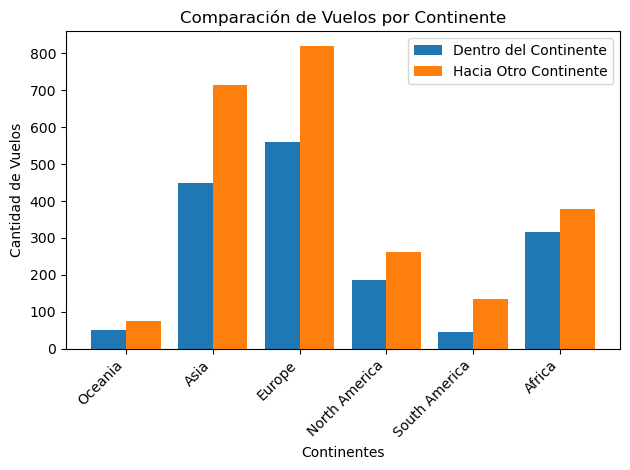

In [15]:
import matplotlib.pyplot as plt

conts = list(same_continent_edges.keys())

hight_same = [same_continent_edges[cont] for cont in conts]
hight_diff = [different_continent_edges[cont] for cont in conts]

pos = range(len(conts))
width = 0.4

plt.bar([p - width / 2 for p in pos], hight_same, width, label='Dentro del Continente')
plt.bar([p + width / 2 for p in pos], hight_diff, width, label='Hacia Otro Continente')

plt.xlabel('Continentes')
plt.ylabel('Cantidad de Vuelos')

plt.xticks(pos, conts, rotation=45, ha='right')
plt.legend()
plt.title('Comparación de Vuelos por Continente')
plt.tight_layout()
plt.show()

Como se puede observar en el gráfico, mi hipótesis pareciera cumplirse. Aunque no suele haber más vuelos intra-continentes que inter-continentes, estos valores se asemejan mucho, y evidentemente hay homofilia. Si no hubiese homofilia, la altura de las barras dentro del continente debería ser, en general, mucho menor, proporcionales a la cantidad de nodos del respectivo continente.

Estas afirmaciones se pueden observar también en el próximo gráfico, donde se muestra el threshold previamente calculado.

In [16]:
props_cont = {}
prop_total = (G_homofilia_analysis.number_of_edges() - sum(same_continent_edges.values())) / G_homofilia_analysis.number_of_edges()
props_cont["Total"] = prop_total

for cont in conts:
    # Divido por dos para darle el mismo peso a todas las aristas
    props_cont[cont] = different_continent_edges[cont] / (2 * same_continent_edges[cont] + different_continent_edges[cont])

props_cont

{'Total': 0.4259656652360515,
 'Oceania': 0.42045454545454547,
 'Asia': 0.44382371198013654,
 'Europe': 0.4223826714801444,
 'North America': 0.41232227488151657,
 'South America': 0.5982142857142857,
 'Africa': 0.37561942517343905}

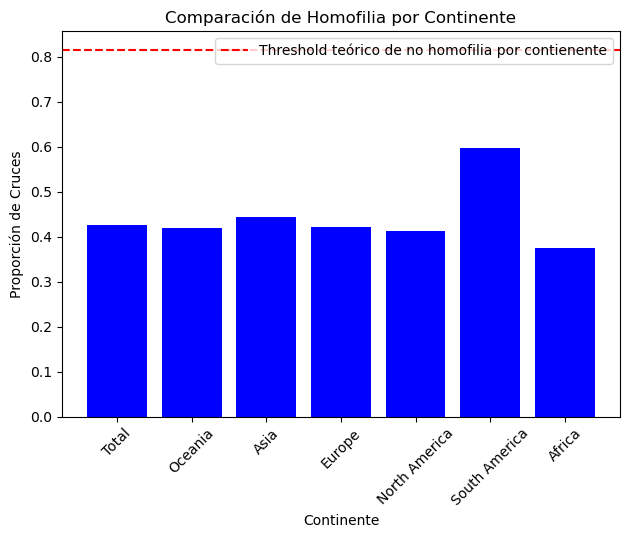

In [17]:
bars = list(props_cont.keys())
plt.bar(bars, props_cont.values(), color='b')
plt.xlabel('Continente')
plt.ylabel('Proporción de Cruces')
plt.title('Comparación de Homofilia por Continente')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold teórico de no homofilia por contienente')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

En esta visualización se puede ver muy claramente que sí hay homofilia por continente. Mi hipótesis se valida en la red.

Sudamérica es compensada un poco por los otros continentes para el valor total obtenido. Sin embargo, los valores para todos los continentes son similares, con un pico mucho menor (casi un medio) respecto al threshold teórico de no-homofilia.

b. Obtener una visualización de las comunidades presentes en dicha red (indicando el algoritmo utilizado).

Utilizo el algoritmo de Louvain que considera la métrica de modularidad para obtener las comunidades.

In [34]:
communities = nx.community.louvain_communities(G, seed=42)

In [31]:
node_community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_mapping[node] = i

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

node_colors = [colors[node_community_mapping[node]] for node in G.nodes]

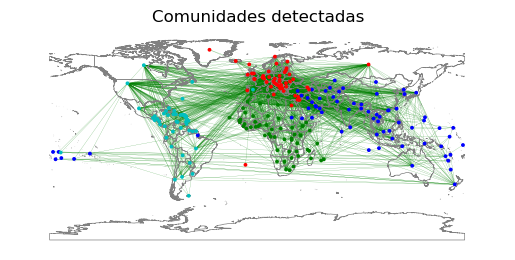

In [33]:
world = gdf.boundary.plot(color='gray', linewidth=0.5)
pos = {row["NAME_EN"]: (row["x"], row["y"]) for _,row in df_more_data.iterrows()} 
nx.draw(G, pos, with_labels=False,node_color=node_colors, width= 0.1, node_size=3, edge_color='green', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')

plt.title('Comunidades detectadas')
plt.show()

En el gráfico de communities se ve muy claramente cómo se detectaron 4 comunidades:

1 - América (Celeste)

2 - Europa (Rojo)

3 - África (Verde)

4 - Asia y Oceanía (Azul)


Hay muy pocos "outliers". Se puede observar a una Guayana de color azul en América, y un pequeño punto celeste en Europa. Fuera de estos dos puntos, la comunidades están muy bien marcadas por los continentes.

c. Considerando lo mencionado en el punto (2.a), ¿corresponde lo encontrado por el algoritmo de detección de
comunidades en relación a lo indicado en dicho punto? ¿Se verifica que efectivamente hay homofilia, o no, según
hayas indicado? ¿como contrastan este resultado con lo indicado (y calculado) anteriormente?

Los resultados obtenidos en el punto (b) corroboran aún más el hecho de que hay homofilia por continente. Los resultados son contundentes. El algoritmo de detección de comunidades detectó 4 comunidades. Por su parte, yo separé a America del Norte de América del Sur, y a Asia de Oceanía. 

En el punto (a) se demostró utilizando el threshold teórico que hay homofilia por continente. En el punto (b) se muestra esto gráficamente utilizando el algoritmo de Louvain.

A pesar de que son resultados esperados por la naturaleza del set de datos (cercanía entre países del mismo continente), me sorprende mucho la separación que hizo el algoritmo de detección de comunidades.

## Ejercicio 3
a. Determinar un tipo de centralidad que podría ser útil calcular para esta red, justificando.

Un tipo de centralidad que me parece útil calcular es la de Betweenness Centrality, ya que se trata de un mapa que conecta países. A través de esta métrica se pueden observar aquellos paises que son centrales para la conexión del mundo.

Otro punto interesante a observar de esta métrica es si hay muchos países con una centralidad alta similar, o si hay pocos países con alta centralidad. Este último caso podría implicar un problema, ya que un conflicto en los aeropuertos de ese país (o determinada política) podría generar una rápida desconexión del mundo a través de la vía area. Además, si un solo país es centro de la conexión, implicaría que tiene demasiado poder.

b. Realizar una representación gráfica de dicha red, considerando la centralidad de los distintos países dada por la métrica del punto a (tamaño de los nodos proporcional a dicha métrica). 


In [35]:
betweenness_centrality = nx.betweenness_centrality(G)

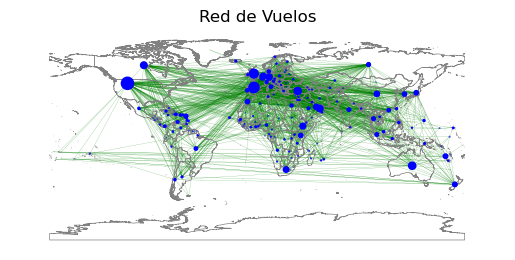

In [36]:
max_node_size = 500

node_size = [max_node_size * betweenness_centrality[node] for node in G.nodes]

world = gdf.boundary.plot(color='gray', linewidth=0.5)
pos = {row["NAME_EN"]: (row["x"], row["y"]) for _,row in df_more_data.iterrows()} 
nx.draw(G, pos, with_labels=False, width= 0.1, node_size=node_size, node_color='blue', edge_color='green', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')

plt.title('Red de Vuelos')
plt.show()

En esta visualización se puede observar que muchos de los países con mayor centralidad se encuentran en Europa. Esto era de esperarse ya que uno podría pensar a Europa como un "punto medio" en el globo: el océano pacífico es más ancho (cantidad de meridianos) que el atlántico. Está idea sin embargo no se cumple con los países de África, lo cual es también interesante. Esto hace pensar que, en general, los habitantes de países Africanos, dependen muchas veces de hacer una escala en Europa para recorrer el mundo. 

Otro punto que me parece interesante remarcar es que en Oceanía y América del Norte (incluyendo Caribe y América Central) hay claramento dos países que se destacan: Estados Unidos y Australia. Estos parecen ser nexos para la conexión del mundo hacia sus continentes.

A continuación hago una visualización con únicamente los países que tuvieron una mayor betweenness centrality, para poder visualizarlos más claramente.

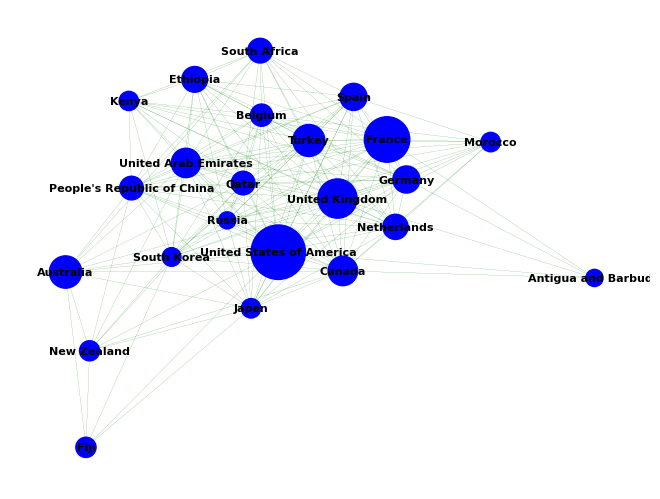

In [37]:
max_node_size = 10000
G_betweenness = G.copy()
node_size = []
for k, v in betweenness_centrality.items():
    if v < 0.015:
        G_betweenness.remove_node(k)
    else:
        node_size.append(max_node_size * v)

nx.draw(G_betweenness, width= 0.1, with_labels=True, node_size=node_size, node_color='blue', edge_color='green', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')

De este último gráfico me parece interesante el hecho de que no hay ningún país de Sudamérica.

## Ejercicio 4
a. Obtener una simulación de un modelado de Erdös-Rényi que corresponda a los parámetros de esta red. 

In [38]:
n = G.number_of_nodes()
p = mean_degree / (n - 1)

# Simulación Erdös Rényi con n nodos y con proabilidad p de que la arista u,v exista.
G_erdos = nx.erdos_renyi_graph(n, p)

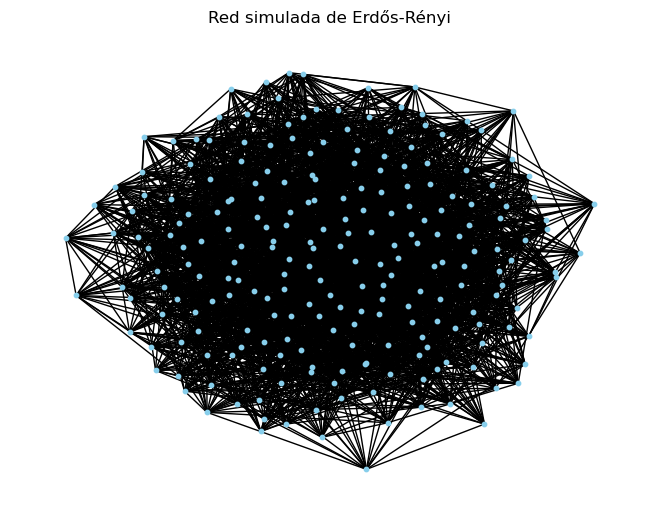

In [39]:
pos = nx.spring_layout(G_erdos)
nx.draw(G_erdos, pos, node_size=10, node_color='skyblue')
plt.title("Red simulada de Erdős-Rényi")
plt.show()


mean_degree_erdos = sum(dict(G_erdos.degree()).values()) / len(G_erdos)
clust_erdos = nx.average_clustering(G_erdos)
diameter_erdos = nx.diameter(G_erdos)
shortest_path_dist = nx.average_shortest_path_length(G)
shortest_path_erdos = nx.average_shortest_path_length(G_erdos)

connected_components = len(list(nx.connected_components(G)))
connected_components_erdos = len(list(nx.connected_components(G_erdos)))

In [40]:
print("Resultados".center(70, "-"))
print("Calculo".center(20) + "Red Real".center(20) + "Erdős-Rényi".center(20))
print("Coef. Clustering".ljust(20) + "{:.2f}".format(clustering_coef).rjust(20) + "{:.2f}".format(clust_erdos).rjust(20))
print("Diametros".ljust(20) + f"{diameter}".rjust(20) + f"{diameter_erdos}".rjust(20))
print("Distancia Promedio".ljust(20) + "{:.2f}".format(shortest_path_dist).rjust(20) + "{:.2f}".format(shortest_path_erdos).rjust(20))
print("Grado Promedio".ljust(20) + "{:.2f}".format(mean_degree).rjust(20) + "{:.2f}".format(mean_degree_erdos).rjust(20))
print("Componentes Conexas".ljust(20) + f"{connected_components}".rjust(20) + f"{connected_components_erdos}".rjust(20))

------------------------------Resultados------------------------------
      Calculo             Red Real          Erdős-Rényi     
Coef. Clustering                    0.66                0.11
Diametros                              4                   3
Distancia Promedio                  2.24                1.94
Grado Promedio                     25.02               25.09
Componentes Conexas                    1                   1


Tal como fue observado en clase, Erdős-Rényi se comporta similar a la red real con respecto a Distancias y Grados, pero el coeficiente de clustering, y la distribución de los grados es muy diferente.

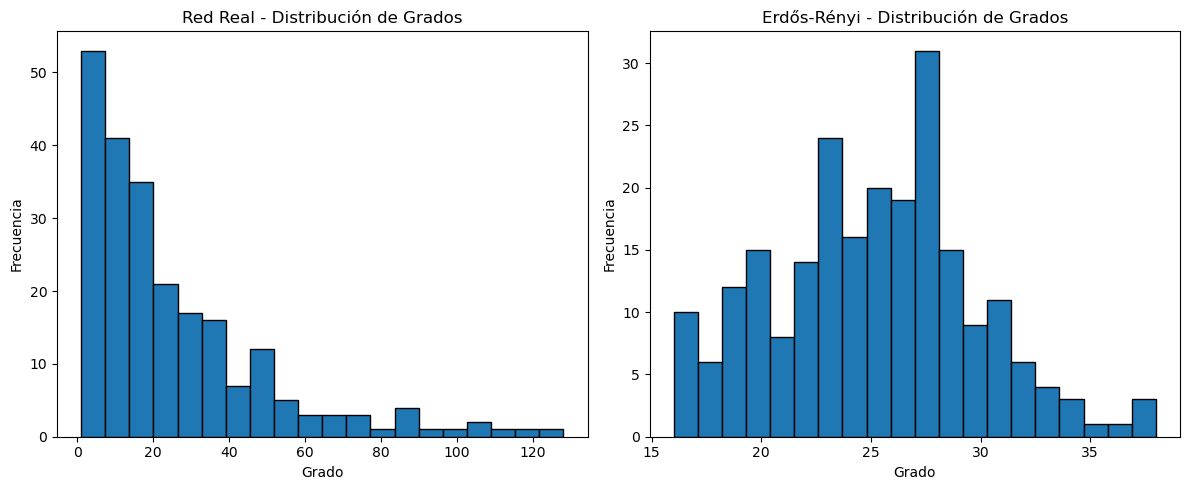

In [41]:
degrees = [degree for node, degree in G.degree()]
degrees_erdos = [degree for node, degree in G_erdos.degree()]

plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=20, edgecolor='k')
plt.title("Red Real - Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(degrees_erdos, bins=20, edgecolor='k')
plt.title("Erdős-Rényi - Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

b. Obtener una simulación de un modelado de Preferential Attachment (ley de potencias) que corresponda a los parámetros de esta red. 

In [42]:
n = G.number_of_nodes()
m = round(mean_degree)

# Documentación del método:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph
# Genera un grafo usando preferential attachment del tipo Barabasi Albert.
G_preferential_att = nx.barabasi_albert_graph(n, m)

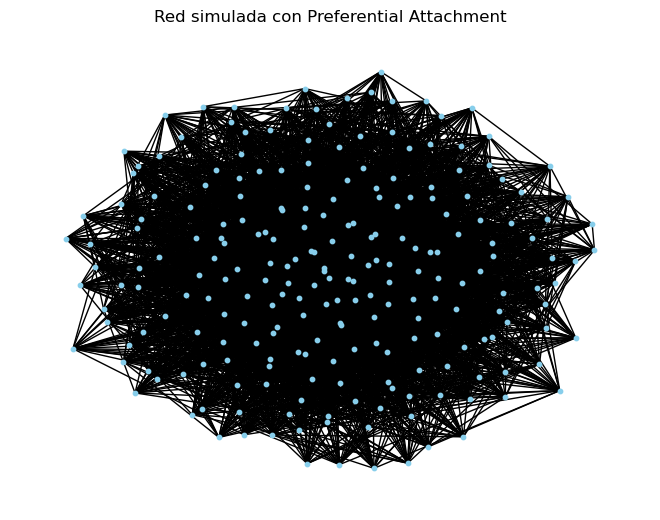

------------------------------Resultados------------------------------
      Calculo             Red Real      Preferential Attachment
Coef. Clustering                    0.66                0.11
Diametros                              4                   3
Distancia Promedio                  2.24                1.80
Grado Promedio                     25.02               25.09
Componentes Conexas                    1                   1


In [43]:
pos = nx.spring_layout(G_preferential_att)
nx.draw(G_preferential_att, pos, node_size=10, node_color='skyblue')
plt.title("Red simulada con Preferential Attachment")
plt.show()

mean_degree_preferential_att = sum(dict(G_preferential_att.degree()).values()) / len(G_preferential_att)
clust_preferential_att = nx.average_clustering(G_preferential_att)
diameter_preferential_att = nx.diameter(G_preferential_att)
shortest_path_erdos = nx.average_shortest_path_length(G_preferential_att)
connected_components_preferential_att = len(list(nx.connected_components(G_preferential_att)))

print("Resultados".center(70, "-"))
print("Calculo".center(20) + "Red Real".center(20) + "Preferential Attachment".center(20))
print("Coef. Clustering".ljust(20) + "{:.2f}".format(clustering_coef).rjust(20) + "{:.2f}".format(clust_erdos).rjust(20))
print("Diametros".ljust(20) + f"{diameter}".rjust(20) + f"{diameter_erdos}".rjust(20))
print("Distancia Promedio".ljust(20) + "{:.2f}".format(shortest_path_dist).rjust(20) + "{:.2f}".format(shortest_path_erdos).rjust(20))
print("Grado Promedio".ljust(20) + "{:.2f}".format(mean_degree).rjust(20) + "{:.2f}".format(mean_degree_erdos).rjust(20))
print("Componentes Conexas".ljust(20) + f"{connected_components}".rjust(20) + f"{connected_components_erdos}".rjust(20))

Utilizando Preferential Attachment, el Coeficiente de Clustering no mejoró. Sin embargo, tal como se ve en las siguientes figuras, la distribución de los grados mejoró, aunque con un corrimiento horizontal sobre el grado mínimo. 

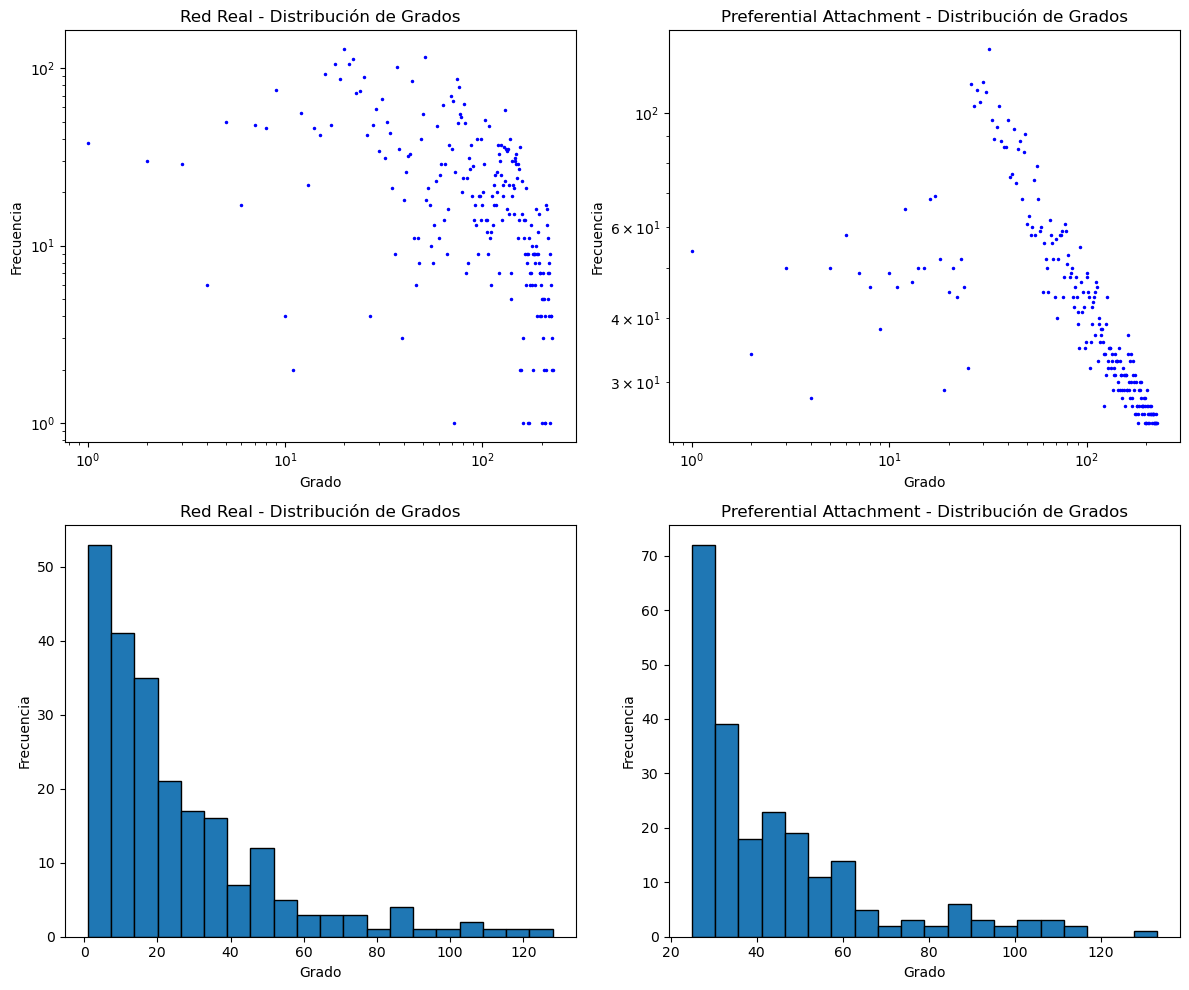

In [44]:
degrees = [degree for node, degree in G.degree()]
degrees_preferential_att = [degree for node, degree in G_preferential_att.degree()]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].loglog(degrees, 'b.', markersize=3)
axes[0, 0].set_title("Red Real - Distribución de Grados")
axes[0, 0].set_xlabel("Grado")
axes[0, 0].set_ylabel("Frecuencia")

axes[0, 1].loglog(degrees_preferential_att, 'b.', markersize=3)
axes[0, 1].set_title("Preferential Attachment - Distribución de Grados")
axes[0, 1].set_xlabel("Grado")
axes[0, 1].set_ylabel("Frecuencia")

axes[1, 0].hist(degrees, bins=20, edgecolor='k')
axes[1, 0].set_title("Red Real - Distribución de Grados")
axes[1, 0].set_xlabel("Grado")
axes[1, 0].set_ylabel("Frecuencia")

axes[1, 1].hist(degrees_preferential_att, bins=20, edgecolor='k')
axes[1, 1].set_title("Preferential Attachment - Distribución de Grados")
axes[1, 1].set_xlabel("Grado")
axes[1, 1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

c. Obtener una representación de anonymous walks tanto de la red original como para las dos simuladas en los puntos a y b. Determinar por distancia coseno cuál sería la simulación más afín.

In [45]:
import random
import math

def anon_walk(G, length):
    v = random.choice(list(G.nodes))
    anon_dict = {}
    anon_dict[v] = "0"
    anon = "0"
    while len(anon) < length:
        v = random.choice(list(G.neighbors(v)))
        if v in anon_dict:
            anon += anon_dict[v]
        else:
            anon += str(len(anon_dict))
            anon_dict[v] = str(len(anon_dict))       
    return anon

In [46]:
length = 5
nu = 52
epsilon = 0.01
delta = 0.01
m = math.ceil((2 / (epsilon**2) * (math.log(2**nu - 2) - math.log(delta))))

In [47]:
def get_anon_vector(G, m, length):
    anons = defaultdict(int)
    for i in range(m):
        walk = anon_walk(G, length)
        anons[walk] += 1
    return dict(anons)

In [48]:
G_vect = get_anon_vector(G, m, length)
G_vect_pref = get_anon_vector(G_preferential_att, m, length)
G_vect_erdos = get_anon_vector(G_erdos, m, length)

In [49]:
def norm(anon_vect):
    return math.sqrt(sum([item ** 2 for item in anon_vect.values()]))

def cosine_dist(anon_vect_1, anon_vect_2):
    cumm = 0
    for k, v in anon_vect_1.items():
        if k in anon_vect_2:
            cumm += anon_vect_2[k] * v
    return cumm / (norm(anon_vect_1) * norm(anon_vect_2))

In [50]:
print(f"Distancia entre G real y Erdos: {cosine_dist(G_vect, G_vect_pref)}")
print(f"Distancia entre G real y Preferential Attachment: {cosine_dist(G_vect, G_vect_erdos)}")

Distancia entre G real y Erdos: 0.999036554875539
Distancia entre G real y Preferential Attachment: 0.9998022997283769


Luego de haber corrido el algoritmo múltiples veces con distintos valores de length, no pude sacar resultados concluyentes entre las simulaciones. Por lo general suele tener más cercanía Preferential Attachment, pero el resultado no es tan significativo. 

Ambas tienen una distancia coseno muy similar a la de la red real, principalmente porque los anonymous walks suelen ser de secuencias con todos nodos diferentes (secuencia 1-2-3-4-5). Esto genera que el ángulo entre los vectores sea muy pequeño (la magnitud de su componente 1-2-3-4-5 es muy alta).

## Ejercicio 5
a. Calcular los motifs de hasta 5 nodos de la subred definida en el punto 1.c. 

In [ ]:
import networkx as nx
import pandas as pd
import sys
sys.path.append('./social-networks-utils')
from motifs.calculos import calcular_motifs

df = pd.read_csv('World.csv')
G = nx.from_pandas_edgelist(df, edge_attr='ConexionAeropuertos',\
                            source='Origen', target='Destino', create_using=nx.Graph())

MAX_MOTIFS = 5

motifs = calcular_motifs(G, MAX_MOTIFS)

b. Calcular el promedio y desvío estandar de los motifs de una red de baseline. Calcular el significant profile de la red, y hacer un gráfico. 

In [ ]:
base_line_g = G_erdos

In [ ]:
n = G.number_of_nodes()
p = mean_degree / (n - 1)

N_rand_prom, N_rand_stds = motif_grafo_eleatorios(lambda: nx.erdos_renyi_graph(n, p), MAX_MOTIFS)

In [ ]:
from motifs.calculos import significance_profile
N_real = motifs

SP = significance_profile(N_real, N_rand_prom, N_rand_stds)

c. Intentar dar con una explicación del resultado obtenido en el punto anterior. 

## Ejercicio 6
Detectar los roles en dicha red utilizando el algoritmo RolX, explicando el resultado obtenido.

In [ ]:
from graphrole import RoleExtractor, RecursiveFeatureExtractor

feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
role_extractor.roles

## Ejercicio 7
Determinar los puentes (globales o locales) en dicha red. 

In [ ]:
list(nx.bridges(G))